In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils import *
import matplotlib.pyplot as plt
from collections import Counter
import os

2023-06-20 15:55:13.493033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 15:55:14.643023: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
folder_path = './points'

x, y = read_data2(folder_path)

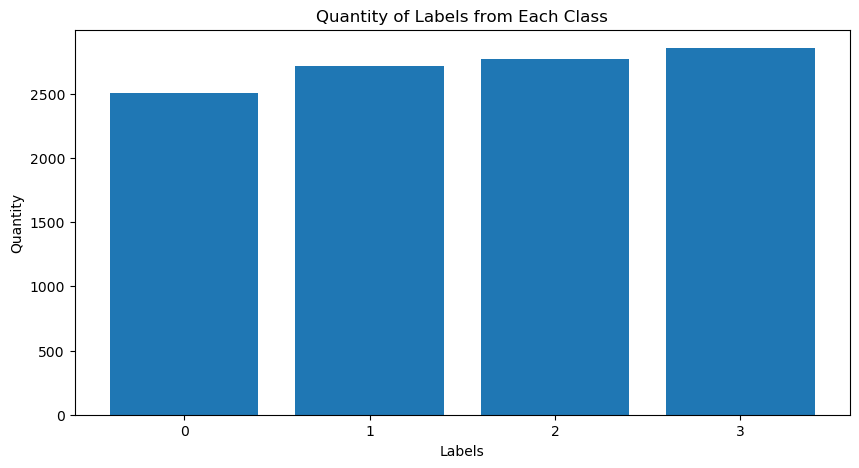

In [3]:
draw_bar_chart(y)

[0 1 2 3]
4


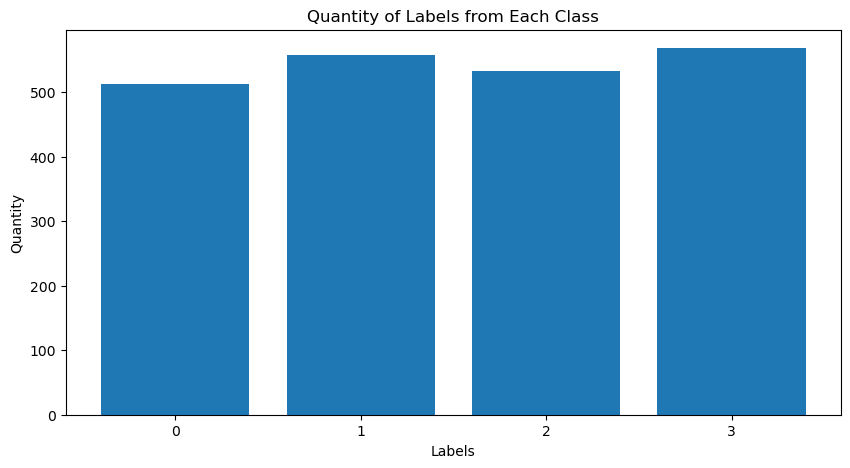

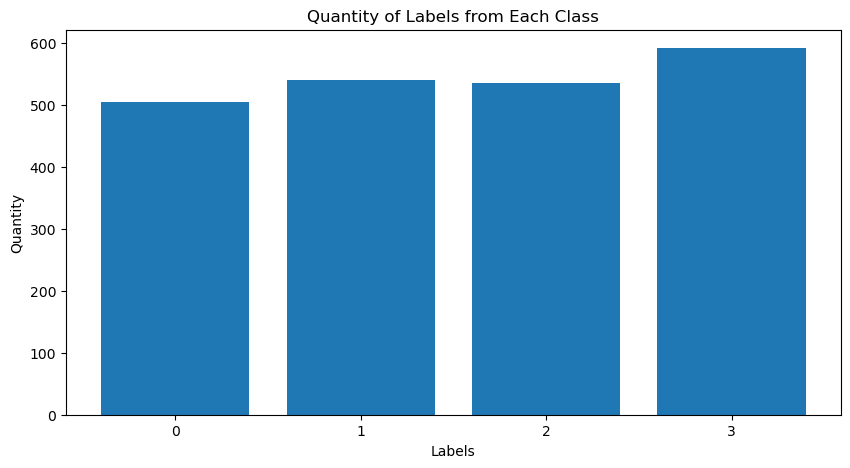

In [4]:
print(np.unique(y))

n_classes = len(np.unique(y))

print(n_classes)

x_train, y_train, x_val, y_val, x_test, y_test = split_and_shuffle(x, y, balanced=False)

draw_bar_chart(y_val)
draw_bar_chart(y_test)

In [7]:
def fc_model(dropout=0.2):
   # Create a `Sequential` model and add a Dense layer as the first layer.
   model = tf.keras.models.Sequential()
   model.add(tf.keras.Input(shape=(5,5,3)))
   model.add(tf.keras.layers.Conv2D(32, 2, activation='relu'))
   model.add(tf.keras.layers.MaxPooling2D(2,1))
   model.add(tf.keras.layers.Flatten())
   model.add(tf.keras.layers.Dropout(dropout))
   model.add(tf.keras.layers.Dense(16, activation='relu'))
   model.add(tf.keras.layers.Dense(n_classes, activation="softmax"))
   return model

In [5]:
with tf.device('/gpu:0'):
    x_train = tf.constant(x_train)
    x_val = tf.constant(x_val)
    x_test = tf.constant(x_test)

2023-06-20 15:55:33.323301: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-20 15:55:33.367882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-20 15:55:33.368569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
model = fc_model()

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["sparse_categorical_accuracy"]
)

model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)]



results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=10,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 4, 32)          416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 16)                4624      
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                        

2023-06-20 15:56:50.927815: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-06-20 15:56:51.735739: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f5dc001f330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-20 15:56:51.735792: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-06-20 15:56:51.743128: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-20 15:56:51.933057: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


408/408 [==============================] - 6s 6ms/step - loss: 1.2904 - sparse_categorical_accuracy: 0.3862 - val_loss: 1.2321 - val_sparse_categorical_accuracy: 0.4896
Epoch 2/10
408/408 [==============================] - 2s 5ms/step - loss: 1.1781 - sparse_categorical_accuracy: 0.4829 - val_loss: 1.1040 - val_sparse_categorical_accuracy: 0.5477
Epoch 3/10
408/408 [==============================] - 2s 5ms/step - loss: 1.0939 - sparse_categorical_accuracy: 0.5337 - val_loss: 1.0321 - val_sparse_categorical_accuracy: 0.5914
Epoch 4/10
408/408 [==============================] - 2s 5ms/step - loss: 1.0207 - sparse_categorical_accuracy: 0.5810 - val_loss: 0.9694 - val_sparse_categorical_accuracy: 0.6209
Epoch 5/10
408/408 [==============================] - 2s 5ms/step - loss: 0.9744 - sparse_categorical_accuracy: 0.6063 - val_loss: 0.9314 - val_sparse_categorical_accuracy: 0.6278
Epoch 6/10
408/408 [==============================] - 2s 5ms/step - loss: 0.9269 - sparse_categorical_accuracy:

400/408 [============================>.] - ETA: 0s - loss: 0.8931 - sparse_categorical_accuracy: 0.6463

In [7]:
# maior early stopping, dropout, matriz de confusao, alterar batch size, alterar kernel size, transformers

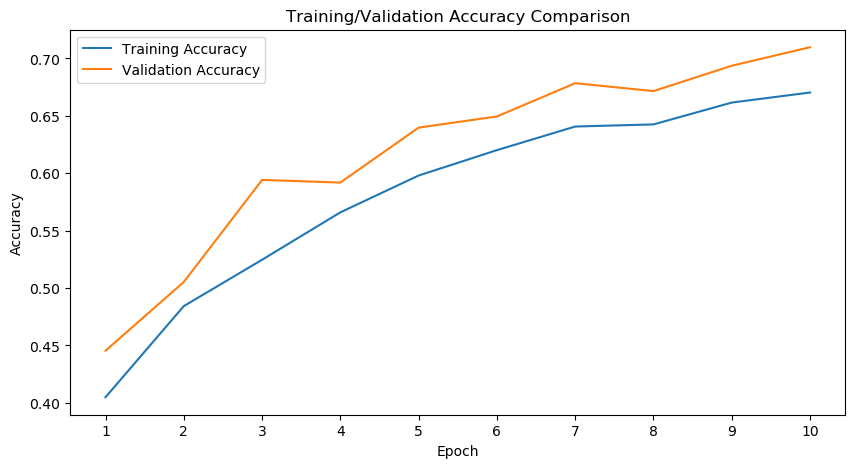

In [8]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

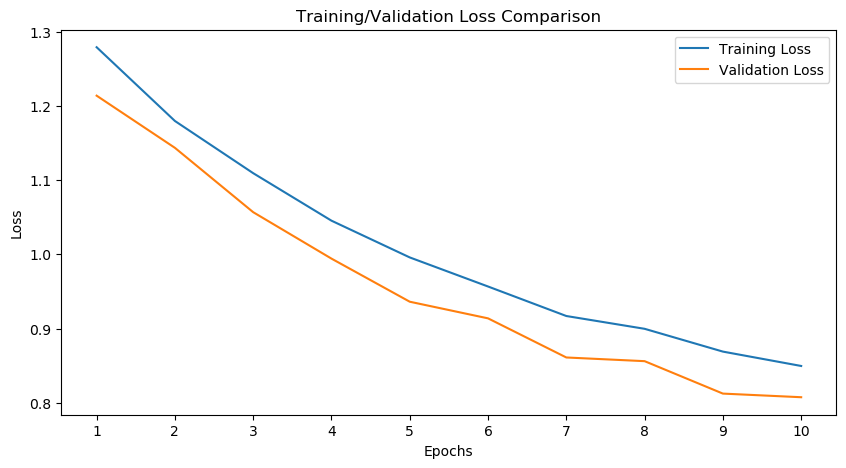

In [9]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

68/68 [==============================] - 0s 3ms/step


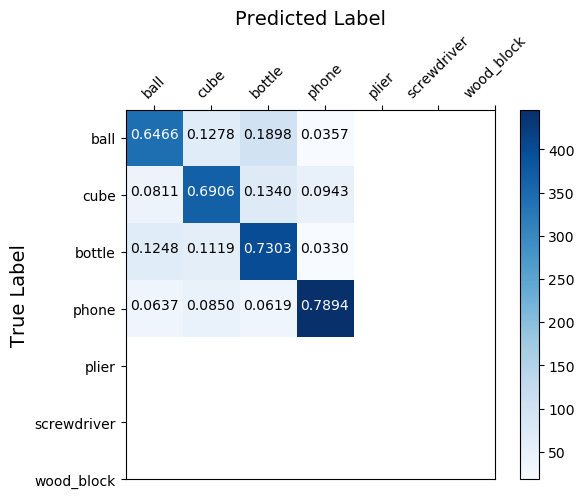

In [10]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
plot_confusion_matrix(y_test, y_pred, ["ball", "cube", "bottle", "phone", "plier", "screwdriver", "wood_block"])

In [11]:
# dropouts=[0.1 * _ for _ in range(6)]
# acc = []
# loss = []

# for d in dropouts:
#     model = fc_model(dropout=d)

#     model.compile(
#         loss="sparse_categorical_crossentropy",
#         optimizer=keras.optimizers.Adam(learning_rate=1e-4),
#         metrics=["sparse_categorical_accuracy"]
#     )

#     callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

#     results = model.fit(
#         x_train,
#         y_train,
#         validation_data=(x_val,y_val),
#         #validation_split=0.2,
#         epochs=100,
#         batch_size=16,
#         callbacks=callbacks,
#     )

#     acc.append(results.history["val_sparse_categorical_accuracy"])
#     loss.append(results.history["val_loss"])

In [12]:
# plot_accuracy_comparison(acc, "Dropout Comparison (Validation Accuracy)", dropouts)


In [13]:
# plot_loss_comparison(loss, "Dropout Comparison (Validation Loss)", dropouts)

In [14]:
# #a = np.array([0,1,0,0,1,0,0,1,0,0])
# #a = np.array([1,1,0,1,1,0,1,1,0,1])
# #a = np.array([2,2,0,2,2,1,2,2,3,2])
# a = np.array([7,7,0,7,7,3,7,7,6,7])

# a = a.reshape((1, a.shape[0],1))

# print(a.shape)

# model.predict(a)

In [15]:
# model.save('../models/points_conv_1d')

In [16]:
#model = tf.keras.models.load_model('../models/transformer_numbers')